# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# Read the dataset

In [2]:
pd.options.display.max_columns = 50
df_train = pd.read_csv("../datasets/KDDTrain+.txt")
df_test = pd.read_csv("../datasets/KDDTest+.txt")

df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.000,0.000,0.000,0.000,0.080,0.150,0.000,255,1,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.000,1.000,0.000,0.000,0.050,0.070,0.000,255,26,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.200,0.200,0.000,0.000,1.000,0.000,0.000,30,255,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.000,0.000,0.000,0.000,1.000,0.000,0.090,255,255,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.000,0.000,1.000,1.000,0.160,0.060,0.000,255,19,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [3]:
# Adjust columns
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df_train.columns = columns
df_test.columns = columns

In [4]:
df_train["attack"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [5]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
unauthorized_Access = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop'
                       'ipsweep','mscan','nmap','portsweep','saint','satan',
                       'buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']

# # we will use these for plotting below
# attack_labels = ['Normal','DDoS','Unauthorized_Access']

# # helper function to pass to data frame mapping
# def map_attack(attack):
#     if attack in dos_attacks:
#         # dos_attacks map to 1
#         attack_type = 1
#     elif attack in unauthorized_Access:
#         # probe_attacks mapt to 2
#         attack_type = 2
#     else:
#         # normal maps to 0
#         attack_type = 0
        
#     return attack_type

# # map the data and join to the data set
# attack_map = df_train.attack.apply(map_attack)
# df_train['attack_map'] = attack_map

# test_attack_map = df_test.attack.apply(map_attack)
# df_test['attack_map'] = test_attack_map

# # view the result
# df_train.head()

# Data Cleaning

## Null Values

In [6]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [8]:
cat_features = df_train.select_dtypes(include='object').columns
unique_values(df_train, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

## Duplicates

In [9]:
df_train.duplicated().sum()

np.int64(0)

## Classify attack or not

In [10]:
attack_n = []
for i in df_train.attack:
  print(i)
  if i == 'normal':
    attack_n.append("normal")
  elif i in dos_attacks:
    attack_n.append("ddos")
  else:
    attack_n.append("unauthorized_access")
df_train['attack'] = attack_n 
df_train['attack']

normal
neptune
normal
normal
neptune
neptune
neptune
neptune
neptune
neptune
neptune
normal
warezclient
neptune
neptune
normal
ipsweep
normal
normal
neptune
neptune
normal
normal
neptune
normal
neptune
normal
normal
normal
ipsweep
neptune
normal
portsweep
normal
normal
normal
neptune
normal
neptune
neptune
neptune
normal
normal
normal
neptune
teardrop
normal
warezclient
neptune
normal
neptune
teardrop
normal
normal
normal
nmap
neptune
neptune
normal
normal
neptune
satan
normal
neptune
normal
portsweep
neptune
neptune
neptune
normal
neptune
normal
normal
neptune
normal
neptune
normal
normal
neptune
normal
neptune
neptune
ipsweep
normal
neptune
normal
neptune
neptune
normal
normal
normal
normal
neptune
neptune
normal
normal
normal
normal
neptune
normal
normal
normal
normal
teardrop
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
portsweep
neptune
normal
normal
normal
neptune
neptune
neptune
normal
neptune
normal
normal
normal
normal
normal
neptune
neptune
normal
nor

0         normal
1           ddos
2         normal
3         normal
4           ddos
           ...  
125967      ddos
125968    normal
125969    normal
125970      ddos
125971    normal
Name: attack, Length: 125972, dtype: object

# EDA - Visualization

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

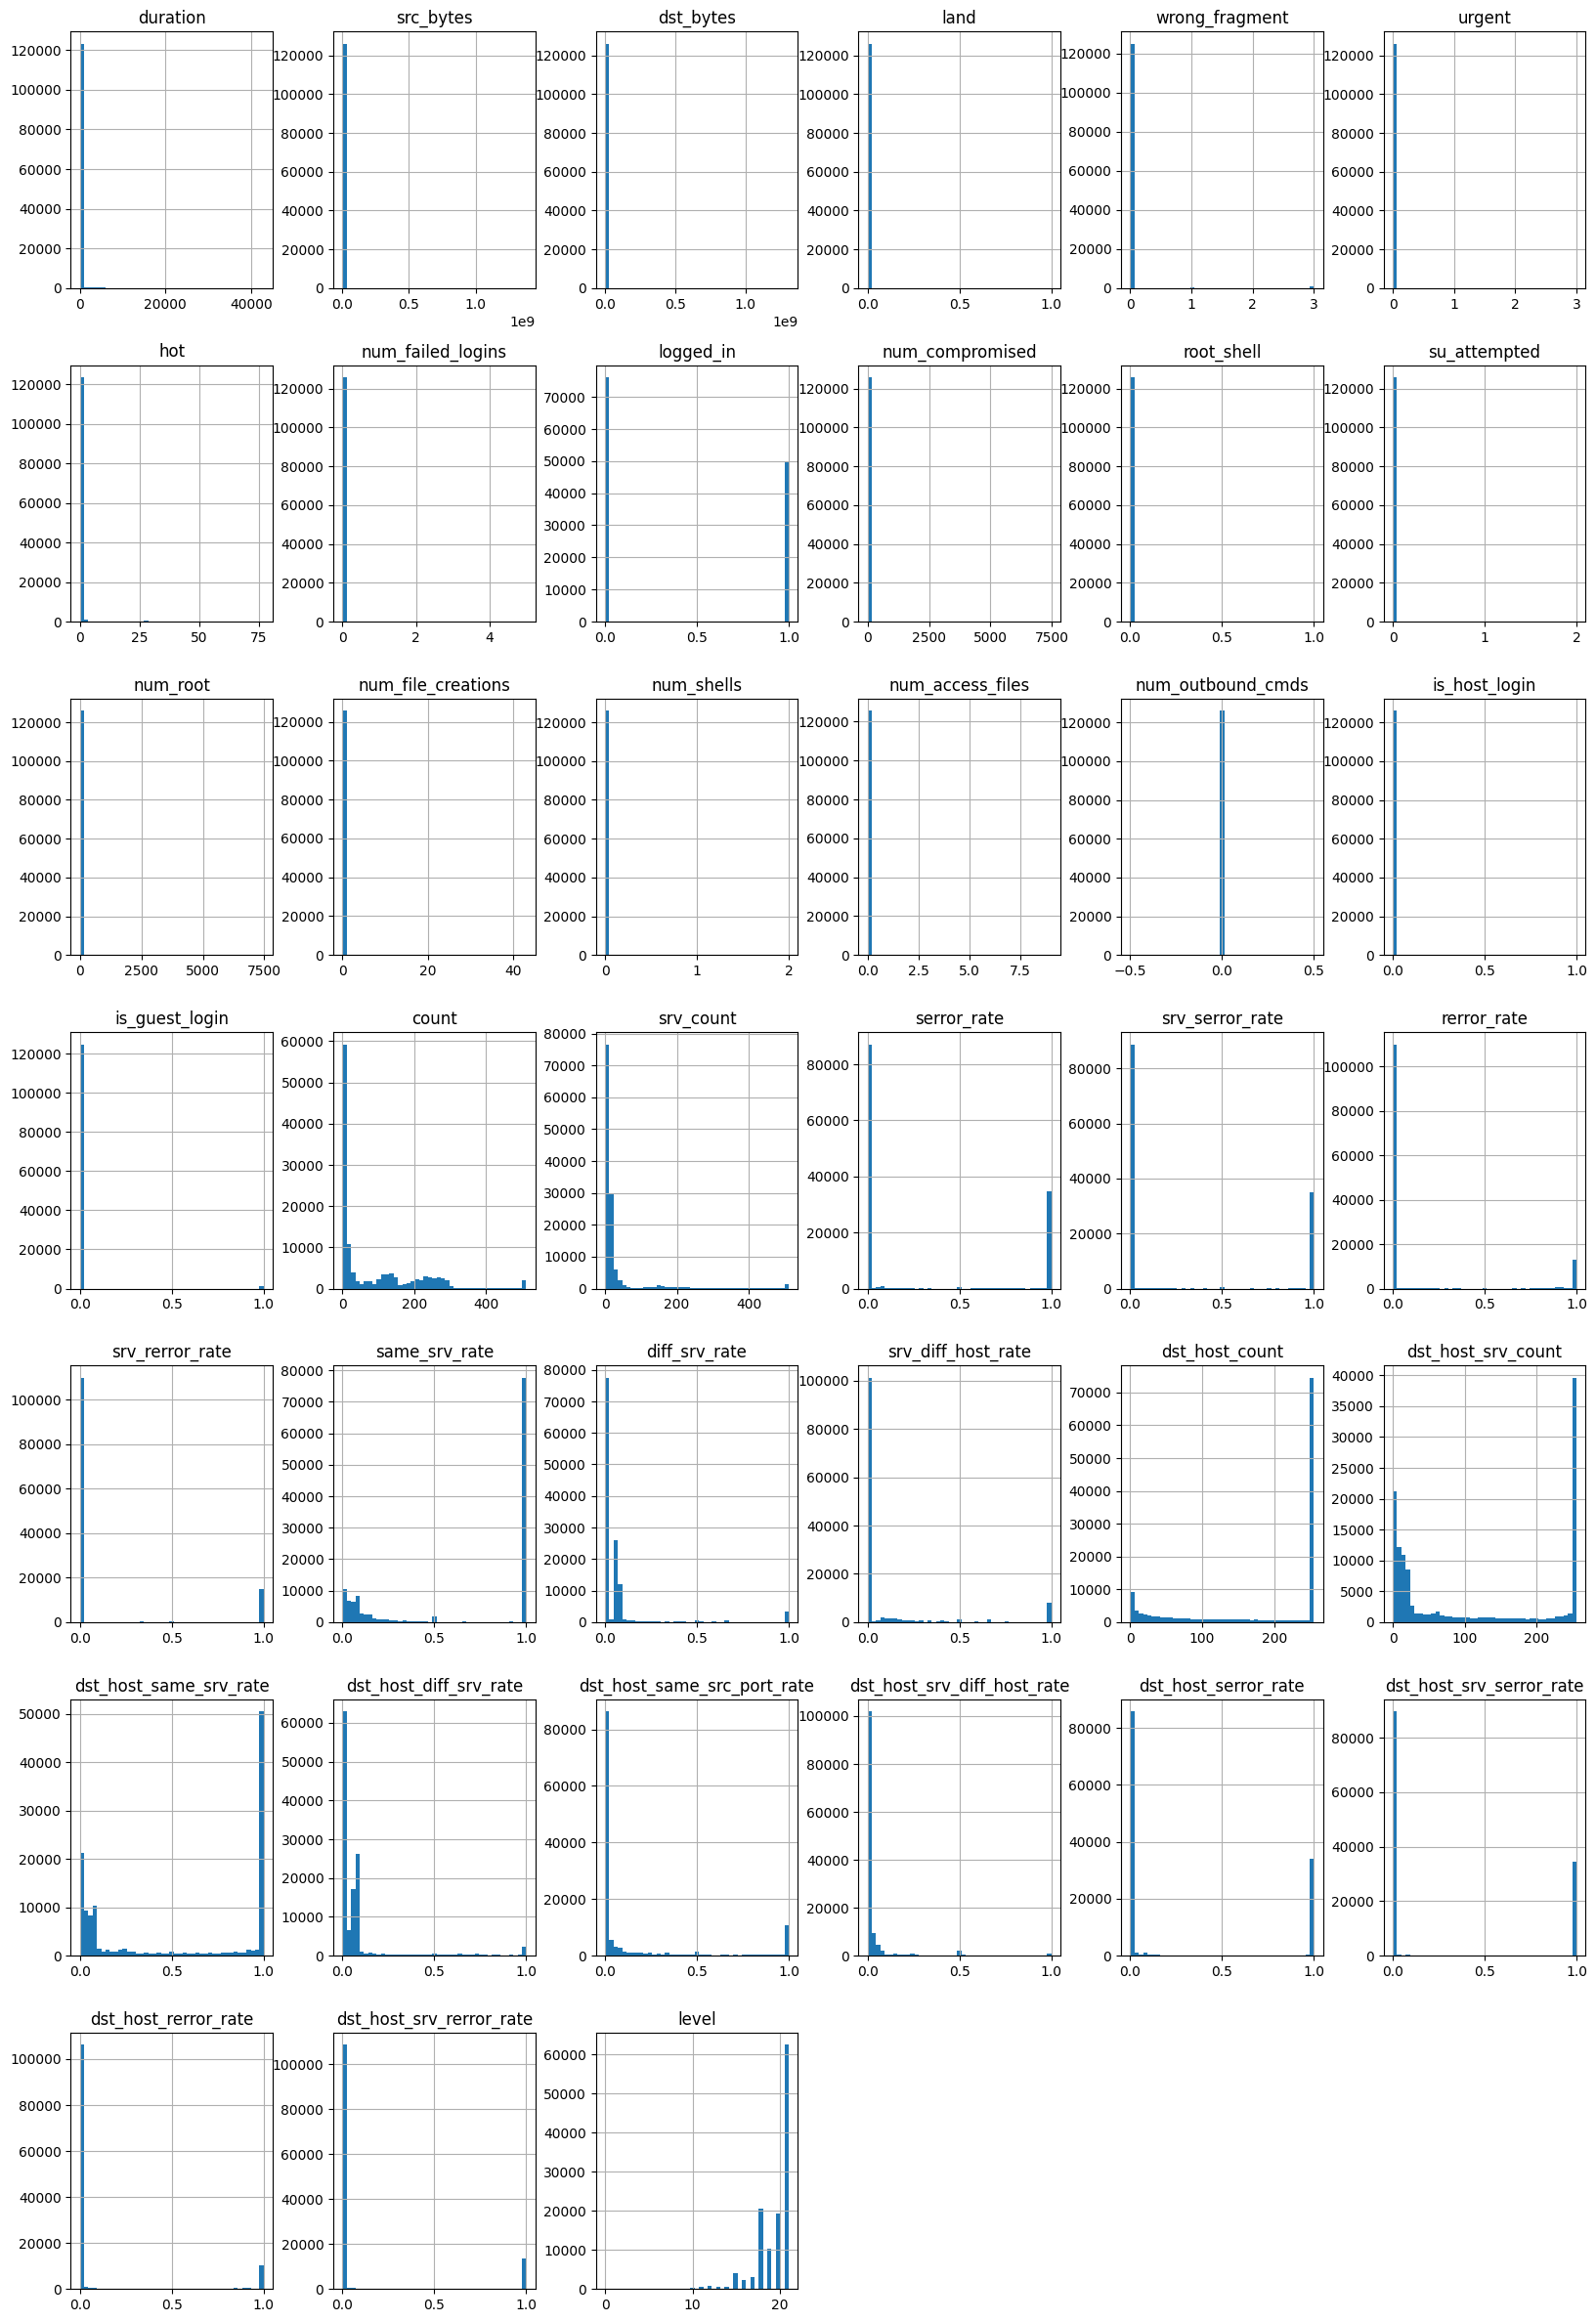

In [11]:
df_train.hist(bins=43,figsize=(20,30))

## Protocol type

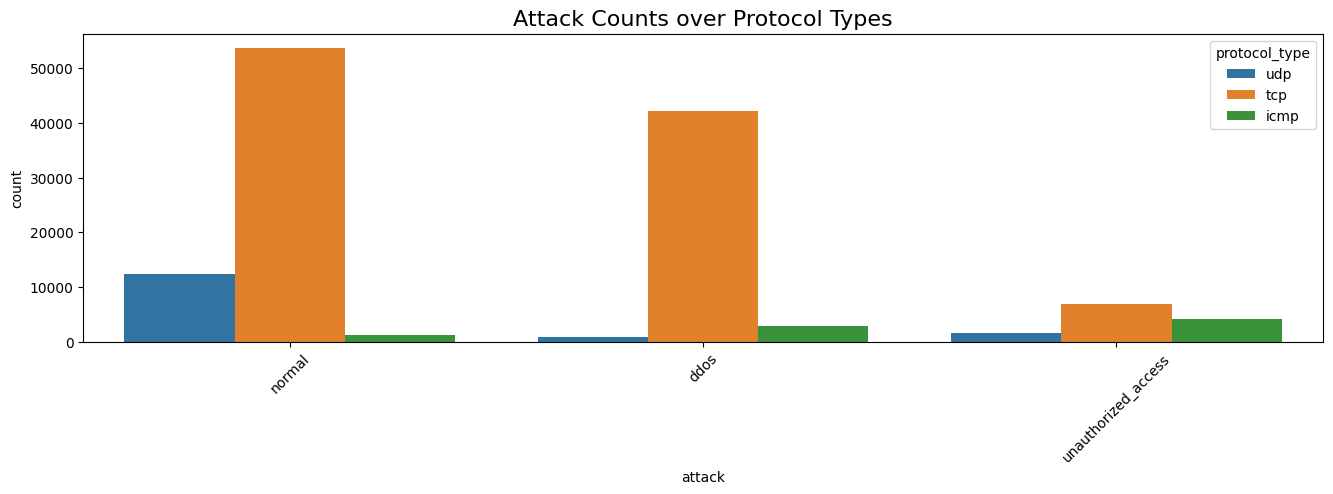

In [12]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

## Service used general

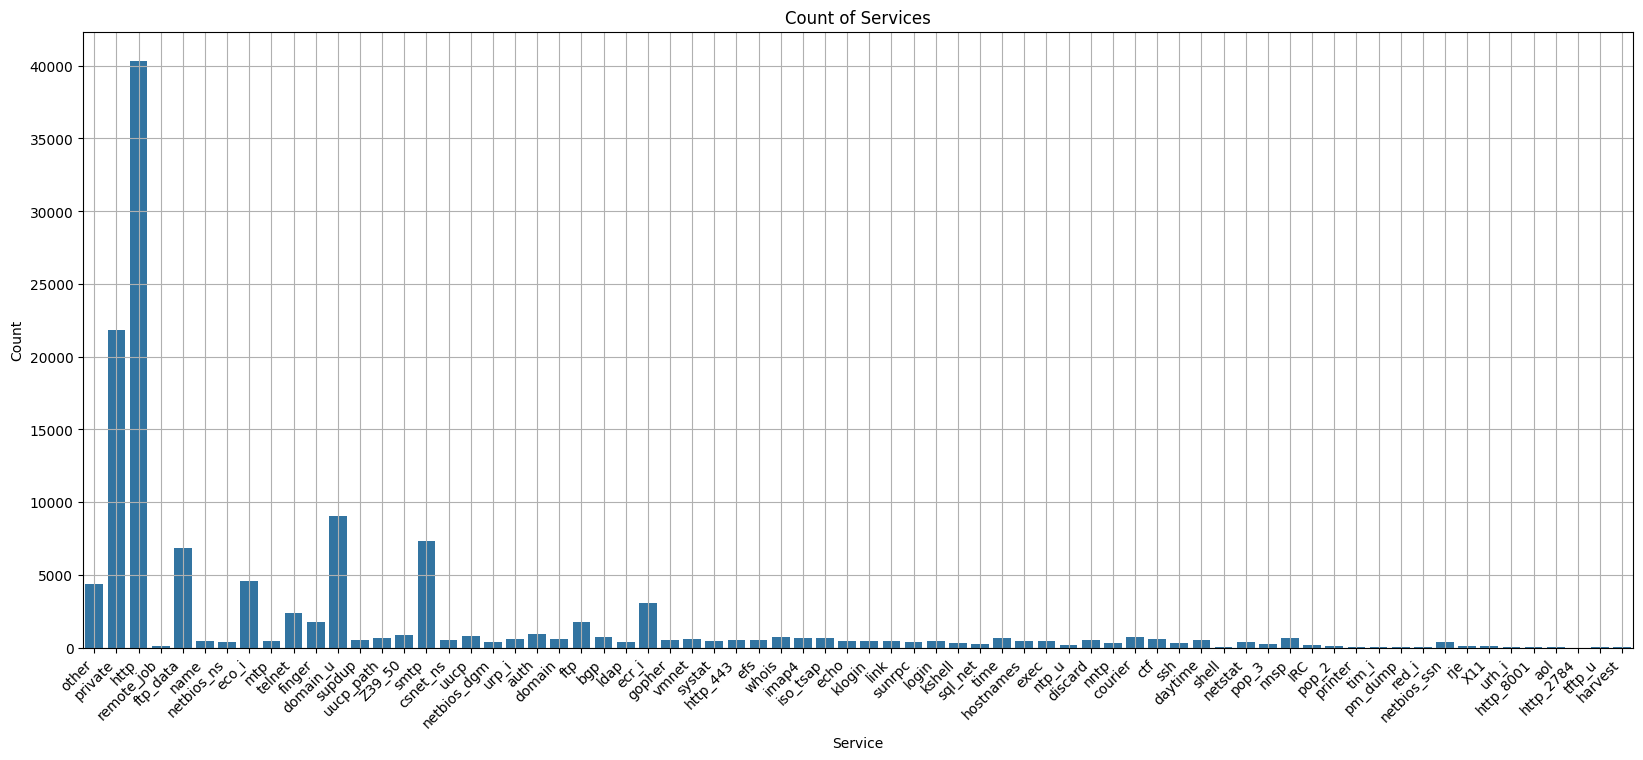

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

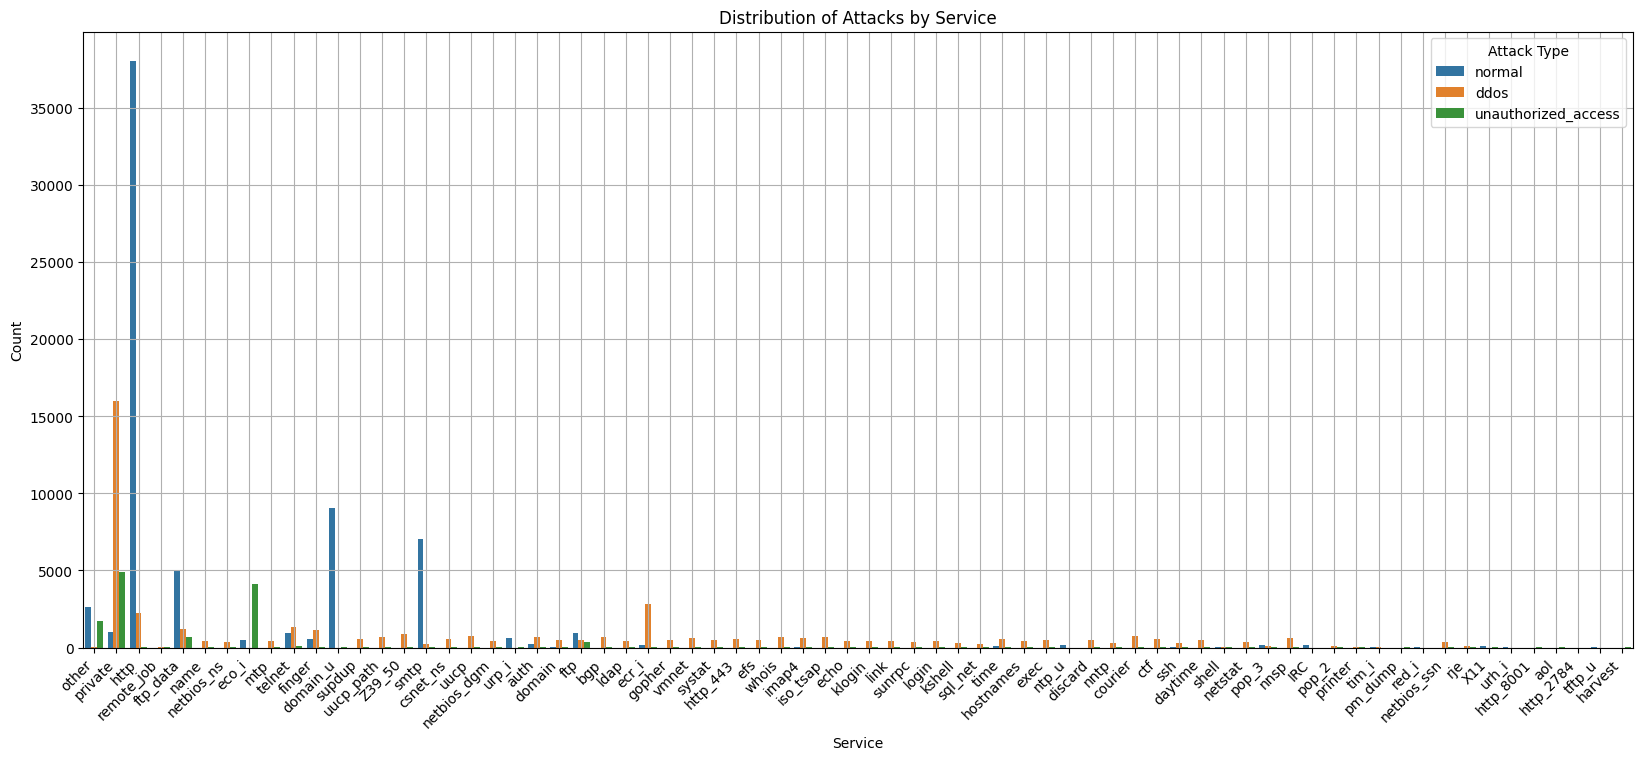

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

## Distribution of Attack Types by Guest Login

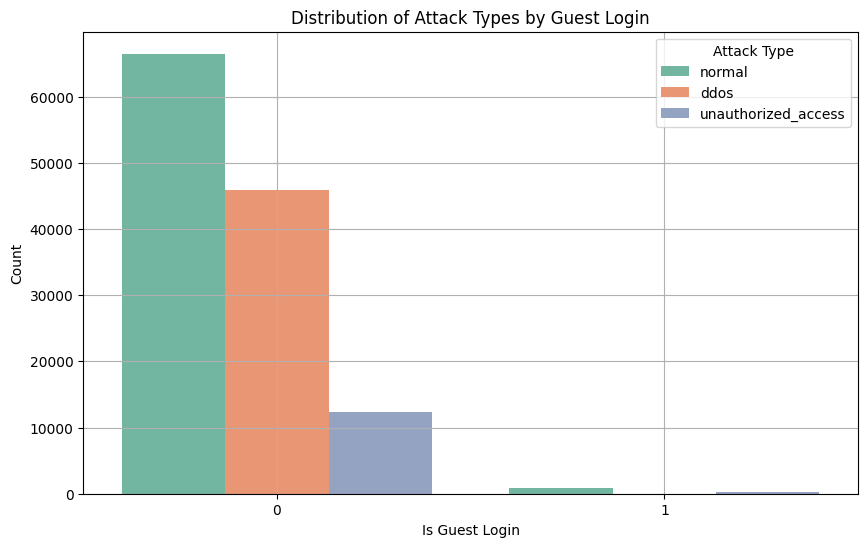

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Preprocessing

## Encoding

In [16]:
cat_features = df_train.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clm = ['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df_train[x] = le.fit_transform(df_train[x])

In [18]:
df_train['service'].unique()

array([44, 49, 24, 51, 20, 36, 38, 14, 35, 60, 18, 12, 58, 67,  2, 54,  7,
       66, 37, 65,  4, 11, 19,  5, 32, 15, 21, 68, 59, 26, 16, 69, 28, 29,
       13, 30, 33, 57, 34, 31, 55, 63, 23, 17, 43, 10, 42,  6,  8, 56,  9,
       53, 40, 47, 41,  0, 46, 48, 62, 45, 50, 39, 52,  1, 64, 27,  3, 25,
       61, 22])

## Train test split

In [19]:
from sklearn.model_selection import train_test_split
X = df_train.drop(["attack"], axis=1)
y = df_train["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=43) 

In [20]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

## Feature Engineering

In [21]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                     0.687
service                       0.572
diff_srv_rate                 0.504
flag                          0.490
same_srv_rate                 0.466
dst_bytes                     0.448
dst_host_diff_srv_rate        0.443
dst_host_srv_count            0.410
count                         0.408
dst_host_same_srv_rate        0.400
dst_host_serror_rate          0.399
serror_rate                   0.385
dst_host_srv_serror_rate      0.372
srv_serror_rate               0.362
logged_in                     0.294
level                         0.249
dst_host_srv_diff_host_rate   0.246
dst_host_same_src_port_rate   0.232
dst_host_count                0.207
srv_count                     0.161
srv_diff_host_rate            0.145
dst_host_rerror_rate          0.092
protocol_type                 0.084
dst_host_srv_rerror_rate      0.080
rerror_rate                   0.076
srv_rerror_rate               0.054
duration                      0.050
hot                         

<Axes: >

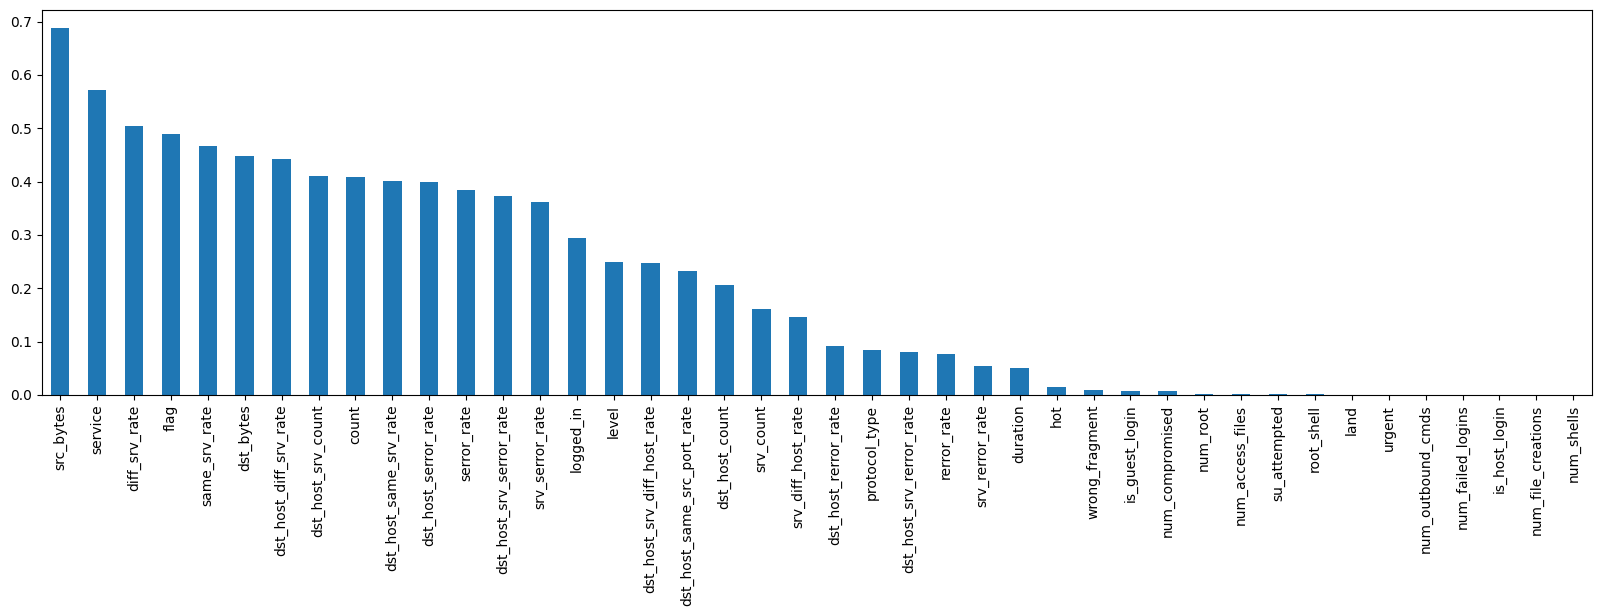

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))

In [23]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [24]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

## Scaling

In [25]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,count,srv_count,serror_rate,srv_serror_rate,rerror_rate
110069,0,0,14,9,8,0,0,0,0,0,1,42,0.000,0.000,0.000
113754,0,1,24,9,295,598,0,0,1,0,10,10,0.000,0.000,0.000
102550,0,0,65,9,183,0,0,0,0,0,2,1,0.000,0.000,0.000
96717,0,1,20,5,0,0,0,0,0,0,261,21,1.000,1.000,0.000
20805,0,1,49,1,0,0,0,0,0,0,2,1,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125205,0,1,24,9,467,9887,0,0,1,0,13,13,0.000,0.000,0.000
40753,0,1,24,9,293,398,0,0,1,0,10,11,0.200,0.180,0.000
116991,0,2,12,9,43,125,0,0,0,0,70,147,0.000,0.000,0.000
19776,0,1,24,9,303,11455,0,0,1,0,12,13,0.000,0.000,0.000


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

# Model Build

In [27]:

from sklearn.ensemble import RandomForestClassifier 
# from xgboost import XGBClassifier

In [28]:
RF_model = RandomForestClassifier(random_state = 42)


In [29]:
RF = RF_model.fit(X_train,y_train)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [31]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [32]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9253     7     1]
 [    4 13363    11]
 [    8    19  2529]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9261
           1       1.00      1.00      1.00     13378
           2       1.00      0.99      0.99      2556

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


Train_Set
[[36648    14     4]
 [   10 53949     5]
 [    9    22 10116]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36666
           1       1.00      1.00      1.00     53964
           2       1.00      1.00      1.00     10147

    accuracy                           1.00    100777
   macro avg       1.00      1.00      1.00    100777
weighted avg       1.00      1.00      1.00    100777



## Inference

In [33]:
y_pred = RF_model.predict(X_test)
y_pred_proba = RF_model.predict_proba(X_test)

rf_f1 = f1_score(y_test, y_pred, average='macro')
rf_recall = recall_score(y_test, y_pred, average='macro')
rf_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

## Feature Importance

In [34]:
model = RF_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['RF_importance'])
ada_imp_feats = feats.sort_values("RF_importance", ascending = False)
ada_imp_feats

,RF_importance
src_bytes,0.221
count,0.132
flag,0.121
dst_bytes,0.111
serror_rate,0.107
srv_serror_rate,0.064
service,0.061
srv_count,0.051
logged_in,0.035
protocol_type,0.034


In [35]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'unauthorized_access', ..., 'normal', 'normal',
       'normal'], shape=(25195,), dtype=object)

# Save and Load Model for inference

In [36]:
import pickle

# Save the model
with open('../Output_model/NSL_KDD/random_forest_model.pkl', 'wb') as f:
    pickle.dump({'preprocessor': scaler, 'model': RF_model, "label_encoder": le}, f)

In [40]:
import pickle

# Load the model
with open('../Output_model/NSL_KDD/random_forest_model.pkl', 'rb') as f:
    RF_model = pickle.load(f)["model"]

# Use for inference
predictions = RF_model.predict(X_test)
y_pred_string = le.inverse_transform(predictions)
print(predictions)
y_pred_string

[1 1 2 ... 1 1 1]


array(['normal', 'normal', 'unauthorized_access', ..., 'normal', 'normal',
       'normal'], shape=(25195,), dtype=object)

In [41]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.000,0.000,1.000,1.000,0.010,0.060,0.000,255,1,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.000,0.000,0.000,0.000,1.000,0.000,0.000,134,86,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.000,0.000,0.000,0.000,1.000,0.000,1.000,3,57,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.000,0.120,1.000,0.500,1.000,0.000,0.750,29,86,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.000,0.000,0.000,0.000,1.000,0.000,0.000,155,255,1.000,0.000,0.010,0.030,0.010,0.000,0.000,0.000,normal,21


In [50]:
attack_n = []
for i in df_test.attack:
  if i == 'normal':
    attack_n.append("normal")
  elif i in dos_attacks:
    attack_n.append("ddos")
  else:
    attack_n.append("unauthorized_access")
df_test['attack'] = attack_n 
df_test['attack']

0        unauthorized_access
1        unauthorized_access
2        unauthorized_access
3        unauthorized_access
4        unauthorized_access
                ...         
22538    unauthorized_access
22539    unauthorized_access
22540    unauthorized_access
22541    unauthorized_access
22542    unauthorized_access
Name: attack, Length: 22543, dtype: object

In [51]:
clm = ['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df_test[x] = le.fit_transform(df_test[x])
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough


X_eval = df_test.drop(["attack"], axis=1)
X_eval=X_eval[columns]

y_eval = df_test["attack"]
print(X_eval.head())
X_eval = scaler.transform(X_eval) 


   duration  protocol_type  service  flag  src_bytes  dst_bytes  \
0         0              1       45     1          0          0   
1         2              1       19     9      12983          0   
2         0              0       13     9         20          0   
3         1              1       55     2          0         15   
4         0              1       22     9        267      14515   

   wrong_fragment  hot  logged_in  num_compromised  count  srv_count  \
0               0    0          0                0    136          1   
1               0    0          0                0      1          1   
2               0    0          0                0      1         65   
3               0    0          0                0      1          8   
4               0    0          1                0      4          4   

   serror_rate  srv_serror_rate  rerror_rate  
0        0.000            0.000        1.000  
1        0.000            0.000        0.000  
2        0.000         

In [52]:
y_val_pred = RF_model.predict(X_eval)
    
print("Test_Set")
print(confusion_matrix(y_eval, y_val_pred))

Test_Set
[[ 6078 13752  2713]
 [    0     0     0]
 [    0     0     0]]


In [45]:
f1_score(y_eval, y_val_pred, average='macro')

0.6957826343682982

In [46]:
y_eval

0        0
1        1
2        2
3        2
4        1
        ..
22538    1
22539    1
22540    0
22541    1
22542    2
Name: attack, Length: 22543, dtype: int64

In [47]:
original = le.inverse_transform(y_val_pred)
print(original)
y_val_pred

['ddos' 'normal' 'unauthorized_access' ... 'ddos' 'normal' 'ddos']


array([0, 1, 2, ..., 0, 1, 0], shape=(22543,))

In [49]:
X_eval[0]

array([-0.11028043, -0.1266413 ,  0.84191074, -2.218474  , -0.00768123,
       -0.00532133, -0.09028666, -0.09467087, -0.80944576, -0.01072502,
        0.45420241, -0.36833984, -0.63556977, -0.63024346,  2.73511918])